Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Renomeando os dados

In [2]:

arquivo = "pam_ibge.csv"

pam_ibge = pd.read_csv(arquivo)

pam_ibge.head(2)


,NC,NN,MN,V,D1C,D1N,D2N,D3N,D4N
0,6,Município,Hectares,19002,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate


In [3]:
pam_ibge.columns

Index(['NC', 'NN', 'MN', 'V', 'D1C', 'D1N', 'D2N', 'D3N', 'D4N'], dtype='object')

In [4]:
pam_ibge.rename(columns={'NC': 'Nível Territorial (Código)', 'NN': 'Nível Territorial', 'MN': 'Unidade de Medida', 'V':'Valor', 'D1C': 'Município (Código)', 'D1N': 'Município', 'D2N': 'Variável', 'D3N': 'Ano', 'D4N':'Produto das lavouras temporárias e permanentes'}, inplace=True)
pam_ibge.head(2)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
0,6,Município,Hectares,19002,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate


In [5]:
pam_ibge.columns

Index(['Nível Territorial (Código)', 'Nível Territorial', 'Unidade de Medida',
       'Valor', 'Município (Código)', 'Município', 'Variável', 'Ano',
       'Produto das lavouras temporárias e permanentes'],
      dtype='object')

Alterando o tipos de dados

In [6]:
pam_ibge.dtypes

Nível Territorial (Código)                         int64
Nível Territorial                                 object
Unidade de Medida                                 object
Valor                                             object
Município (Código)                                 int64
Município                                         object
Variável                                          object
Ano                                                int64
Produto das lavouras temporárias e permanentes    object
dtype: object

In [7]:
pam_ibge["Nível Territorial (Código)"] = (pam_ibge["Nível Territorial (Código)"].astype(str))
pam_ibge["Valor"] = pd.to_numeric(pam_ibge["Valor"], errors="coerce")
pam_ibge["Município (Código)"] = (pam_ibge["Município (Código)"].astype(str))
pam_ibge["Município"] = (pam_ibge["Município"].astype(str))
pam_ibge['Ano'] = pam_ibge['Ano'].astype(int)


In [8]:
pam_ibge.dtypes

Nível Territorial (Código)                         object
Nível Territorial                                  object
Unidade de Medida                                  object
Valor                                             float64
Município (Código)                                 object
Município                                          object
Variável                                           object
Ano                                                 int64
Produto das lavouras temporárias e permanentes     object
dtype: object

In [9]:
pam_ibge.head(10)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
0,6,Município,Hectares,19002.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Total
1,6,Município,Hectares,250.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacate
2,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Abacaxi*
3,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Açaí
4,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Alfafa fenada
5,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Algodão arbóreo (em caroço)
6,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Algodão herbáceo (em caroço)
7,6,Município,Hectares,NaN,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Alho
8,6,Município,Hectares,4000.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Amendoim (em casca)
9,6,Município,Hectares,10.0,3555000,Tupã (SP),Área plantada ou destinada à colheita,2015,Arroz (em casca)


Evolução anual dos produtos de lavouras temporárias e permantes em Toneladas da CATI - Coordenadoria de Assistência Técnica Integral (Regional Tupã)

In [112]:
qutd_produzida1 = pam_ibge[(pam_ibge["Variável"] == "Quantidade produzida") & (pam_ibge["Valor"].notnull())] #Fazendo filtro para pegar a qtd e valor nulos 
qutd_produzida1 = qutd_produzida1.dropna()
qutd_produzida1.head(2)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
1297,6,Município,Toneladas,6188.0,3555000,Tupã (SP),Quantidade produzida,2015,Abacate
1304,6,Município,Toneladas,18000.0,3555000,Tupã (SP),Quantidade produzida,2015,Amendoim (em casca)


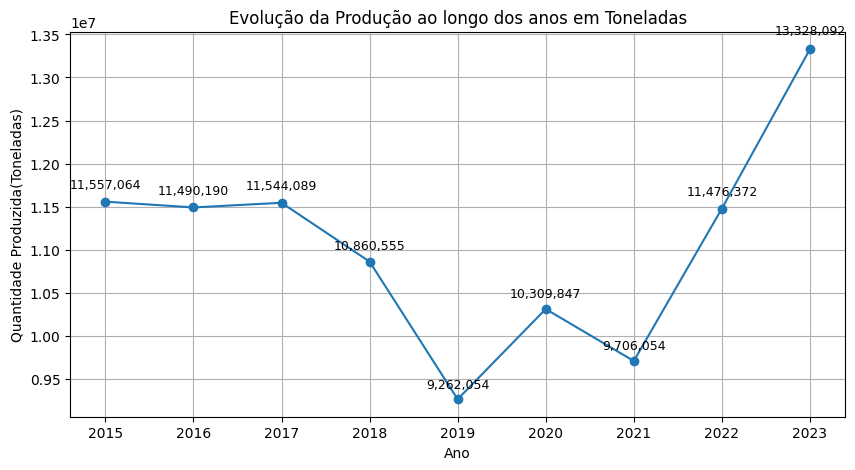

In [111]:
evolucao = pam_ibge.groupby("Ano")["Valor"].sum()

plt.figure(figsize=(10,5))
plt.plot(evolucao.index, evolucao.values, marker = 'o')
plt.title("Evolução da Produção ao longo dos anos em Toneladas")
plt.xlabel("Ano")
plt.ylabel("Quantidade Produzida(Toneladas)")
plt.grid(True)

for x, y in zip(evolucao.index, evolucao.values):
    plt.text(x , y + y*0.01, f"{y:,.0f}", ha="center", va="bottom", fontsize=9)


plt.show()

In [113]:
#validação, somando as toneladas
unidade = qutd_produzida1["Unidade de Medida"].iloc[0]
soma = qutd_produzida1["Valor"].sum()
print("A soma é:", soma, "A unidade de medida:", unidade)

A soma é: 53072852.0 A unidade de medida: Toneladas


Top 10 produtos das Lavouras

In [115]:
qutd_produzida1 = pam_ibge[pam_ibge["Variável"] == "Quantidade produzida"]
prod_grouped = qutd_produzida1.groupby("Produto das lavouras temporárias e permanentes")["Valor"].sum().sort_values(ascending=False)
prod_grouped.head(10)


Produto das lavouras temporárias e permanentes
Cana-de-açúcar            50324099.0
Mandioca                   1207930.0
Amendoim (em casca)         712722.0
Milho (em grão)             165060.0
Melancia                    116675.0
Soja (em grão)              102370.0
Mamão                        69473.0
Batata-doce                  59275.0
Abacate                      45494.0
Café (em grão) Arábica       44376.0
Name: Valor, dtype: float64

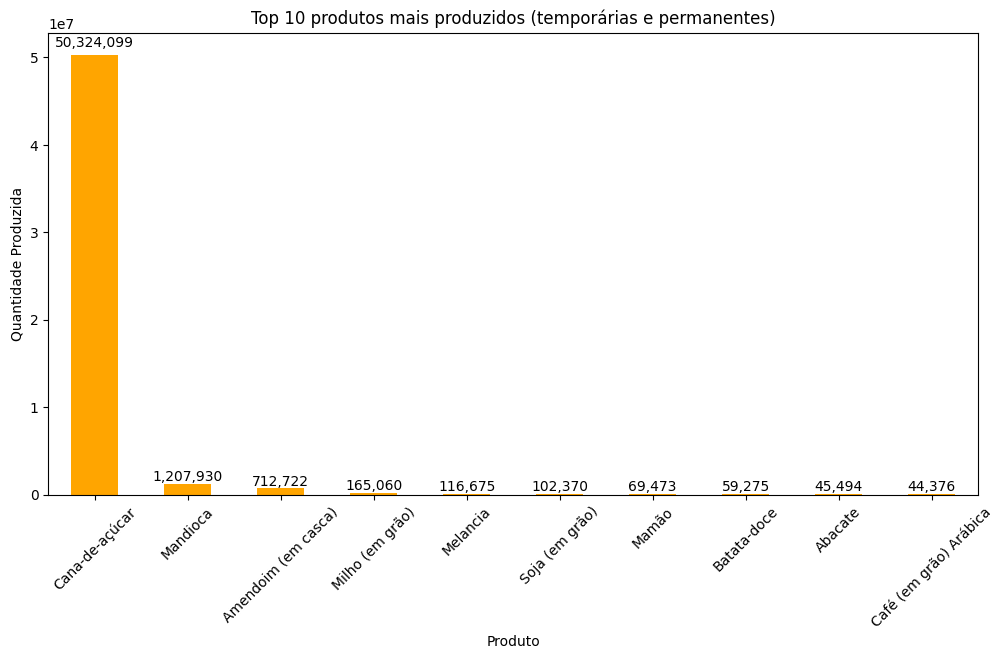

In [116]:

ax = prod_grouped.head(10).plot(
    kind="bar",
    figsize=(12,6),
    color="orange",
    title="Top 10 produtos mais produzidos (temporárias e permanentes)"
)

plt.ylabel("Quantidade Produzida")
plt.xlabel("Produto")
plt.xticks(rotation=45)

# Adicionar os valores no topo das barras
for i, v in enumerate(prod_grouped.head(10)):
    ax.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom')

plt.show()


Top 5 municipios da Regional que tem mais produção em Cana-de-açucar, Mandioca, Amendoim(em casca)

In [117]:
#Filtrando para pegar somemte Cana-de-açucar, Mandioca e Amendoim
produtos_lavouras = pam_ibge[
    (pam_ibge["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"])) &
    (pam_ibge["Variável"] == "Quantidade produzida")]

# Agrupar por município e somar os valores
cana_grouped = produtos_lavouras.groupby("Município")["Valor"].sum().reset_index()
# Selecionar os 5 maiores produtores
top5 = cana_grouped.nlargest(5, "Valor")
print(top5)


           Município      Valor
2   Herculândia (SP)  7289654.0
13         Tupã (SP)  6405644.0
9       Queiroz (SP)  6035664.0
7       Parapuã (SP)  5543271.0
3         Iacri (SP)  5311887.0


Filtros para tirar duvidas sobre as Lavouras


In [118]:
Cafe = qutd_produzida1[qutd_produzida1["Produto das lavouras temporárias e permanentes"] == "Café (em grão) Total"]
soma = Cafe["Valor"].sum()
unidade = Cafe["Unidade de Medida"].iloc[0]
print("A soma é:", soma, "A unidade de medida:", unidade)


A soma é: 44376.0 A unidade de medida: Toneladas


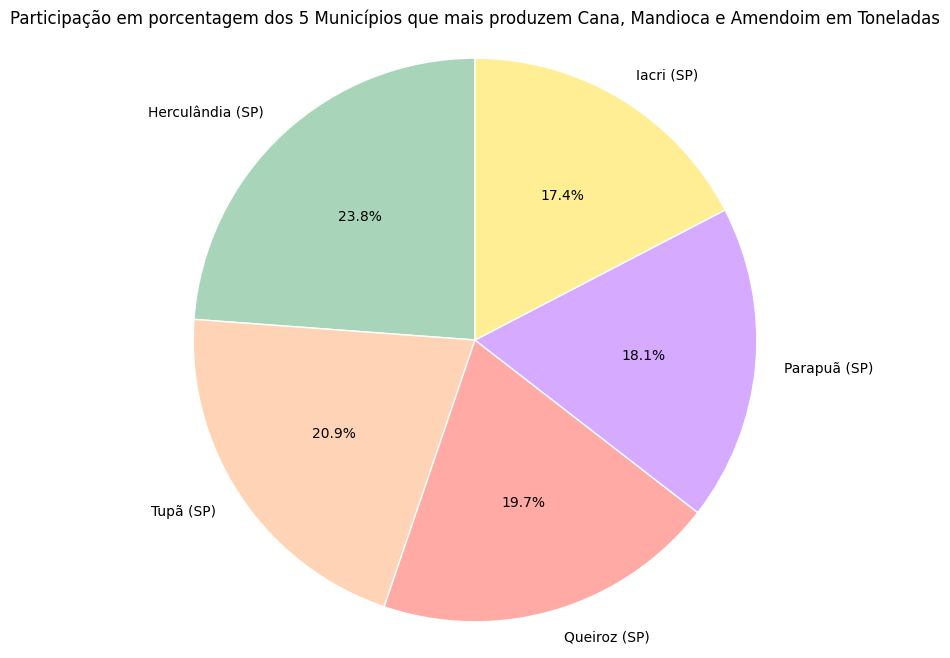

In [45]:
import matplotlib.pyplot as plt

# Dados
labels = top5["Município"]
sizes = top5["Valor"]

# Paleta de cores suaves
colors = ["#A8D5BA", "#FFD3B6", "#FFAAA5", "#D5AAFF", "#FFEE93"]  # tons pastel

# Criar gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"}  # borda branca entre fatias
)
plt.title("Participação em porcentagem dos 5 Municípios que mais produzem Cana, Mandioca e Amendoim em Toneladas")
plt.axis("equal")
plt.show()


Produtividade e eficiência: Área plantada x Rendimento médio

In [ ]:
#somente fazendo filtro para ficar mais fácil o entendimento da análise
qutd_produzida2 = pam_ibge[(pam_ibge["Variável"] == "Rendimento médio da produção") & (pam_ibge["Valor"].notnull())] #Fazendo filtro para pegar a qtd e valor nulos 
qutd_produzida2 = qutd_produzida2.dropna()
qutd_produzida2.head(2)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida,Valor,Município (Código),Município,Variável,Ano,Produto das lavouras temporárias e permanentes
1945,6,Município,Quilogramas por Hectare,24752.0,3555000,Tupã (SP),Rendimento médio da produção,2015,Abacate
1952,6,Município,Quilogramas por Hectare,4500.0,3555000,Tupã (SP),Rendimento médio da produção,2015,Amendoim (em casca)


In [74]:

#filtrando, pegando somente "Cana-de-açúcar", "Mandioca", "Amendoim (em casca)" dentro da variavel Produto das lavouras temporárias e permanentes
produtos_lavouras = pam_ibge[(pam_ibge["Produto das lavouras temporárias e permanentes"].isin(["Cana-de-açúcar", "Mandioca", "Amendoim (em casca)"]))]

#Separando a area plantada e rendimento medio
area_plantada = pam_ibge[pam_ibge["Variável"] == "Área plantada ou destinada à colheita"]["Valor"].astype(float)
rendimento_medio = pam_ibge[pam_ibge["Variável"] == "Rendimento médio da produção"]["Valor"].astype(float)

#renomeando
df_produtividade = produtos_lavouras.pivot_table(
    index="Município",
    columns="Variável",
    values="Valor"
).reset_index()

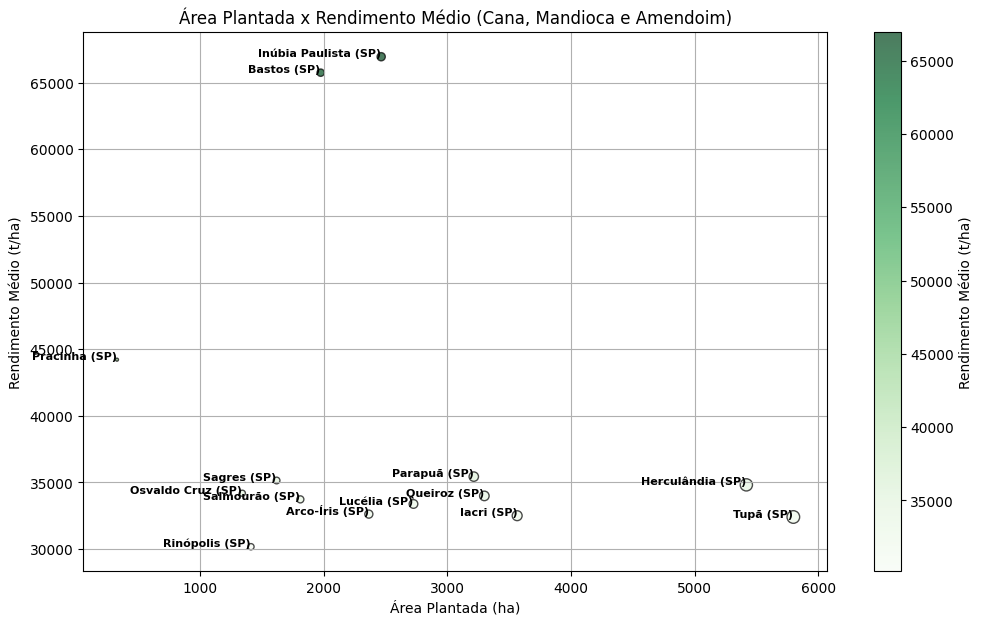

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

# Tamanho e cor dos pontos
sizes = df_produtividade["Área plantada ou destinada à colheita"] / 70 #tamanho dos pontos no grafico
colors = df_produtividade["Rendimento médio da produção"]

scatter = plt.scatter(
    df_produtividade["Área plantada ou destinada à colheita"],
    df_produtividade["Rendimento médio da produção"],
    s=sizes,
    c=colors,
    cmap="Greens",
    alpha=0.7,
    edgecolors="black"
)#o SCATTER é utilizado para gráfico de dispersão, monstra a relação entre duas váriaveis, plotando cada observação no gráfico. 

# Adicionar legenda de cores
cbar = plt.colorbar(scatter)
cbar.set_label("Rendimento Médio (t/ha)")

plt.title("Área Plantada x Rendimento Médio (Cana, Mandioca e Amendoim)")
plt.xlabel("Área Plantada (ha)")
plt.ylabel("Rendimento Médio (t/ha)")
plt.grid(True)

# Adicionar nomes apenas dos top 5 maiores produtores
top_municipios = df_produtividade.nlargest(14, "Área plantada ou destinada à colheita")

for i, row in top_municipios.iterrows():
    plt.text(
        row["Área plantada ou destinada à colheita"],
        row["Rendimento médio da produção"],
        row["Município"],
        fontsize=8,
        weight="bold",
        ha="right"
    )

plt.show()

#entendendo o Gráfico: os Municipios mais a direita como Tupã e Herculândia são os que possuem maior área plantada e também são os maiores produtores
#  já os municipios que estão mais acima no no gráfico tem maior produtividade por hectare
